In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train[0].shape

(28, 28)

5

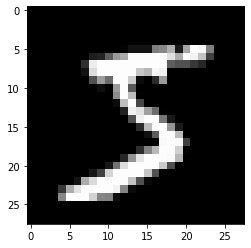

In [4]:
len(x_train)
plt.imshow(x_train[0], cmap = 'gray',  vmin=0, vmax=255)
y_train[0]

In [5]:
x_train = x_train / 255
x_test = x_test / 255

In [6]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)
x_train_flatten.shape 

(60000, 784)

In [8]:
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# No hidden layers #

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid' )
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy'),
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4718 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3045 - accuracy: 0.9145
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2838 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2737 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2672 - accuracy: 0.9251


In [10]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2672 - accuracy: 0.9253


[0.267202228307724, 0.9253000020980835]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

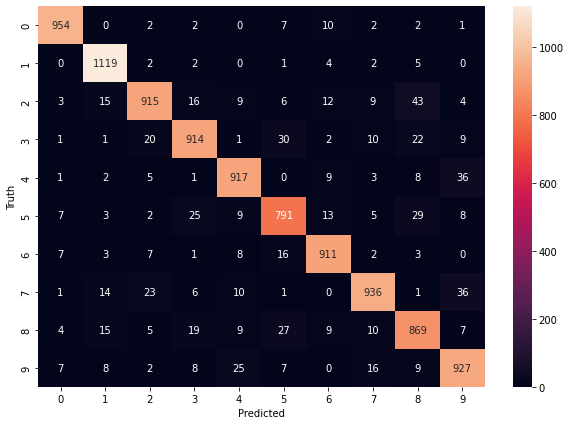

In [11]:
y_predicted = model.predict(x_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

y_test: 5


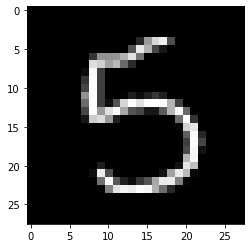

In [12]:
plt.imshow(x_test[53], cmap='gray', vmin=0, vmax=1)
print(f'y_test: {y_test[53]}')

In [13]:
y_predicted = model.predict(x_test_flatten)
np.argmax(y_predicted[53])
print(y_test[53] == np.argmax(y_predicted[53]))
print(y_test[53])

313/313 [==============================] - 0s 1ms/step
True
5


# With hidden layers #

In [14]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2710 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1205 - accuracy: 0.9649
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0842 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0642 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0501 - accuracy: 0.9848


In [15]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0806 - accuracy: 0.9756


[0.08060260862112045, 0.975600004196167]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

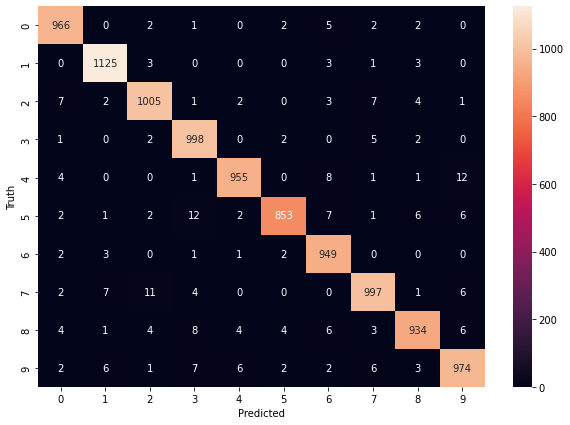

In [16]:
y_predicted = model.predict(x_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# using flatter so we dont have use .reshape in the inputs #

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2701 - accuracy: 0.9221
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1233 - accuracy: 0.9641
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0863 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0666 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0534 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0423 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0340 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0277 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0234 - accuracy: 0.9928
Epoch 10/10
 349/1875 [====>.........................] - ETA: 3s - loss: 0.0156 - 

In [18]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0703 - accuracy: 0.9801


[0.07028128951787949, 0.9800999760627747]